In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Perceptron

In [31]:
class Perceptron:
    def __init__(self, eta=0.01, n_iter=50, seed=1):
        self.rgen=np.random.RandomState(seed)
        self.eta=eta
        self.n_iter=n_iter
    def fit(self,X,y):
        self.w_=self.rgen.normal(loc=0,scale=0.01,size=X.shape[1])
        self.b_=np.float_(0.)
        self.errors_=[]
        for _ in range(self.n_iter):
            error=0
            for xi,target in zip(X,y):
                update=self.eta*(target-self.predict(xi))
                self.w_+=xi*update
                self.b_+=update
                error+=int(update != 0.0)
            self.errors_.append(error)
        return self
    def net_input(self,X):
        return np.dot(X,self.w_) + self.b_
    def predict(self,X):
        return np.where(self.net_input(X) >= 0.0, 1, 0)

In [4]:
s = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
df = pd.read_csv(s,header=None,encoding='utf-8')

In [5]:
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [32]:
X=df.iloc[:100,[0,2]].values
y=df.iloc[:100,4].values
y=np.where(y=='Iris-setosa',0,1)

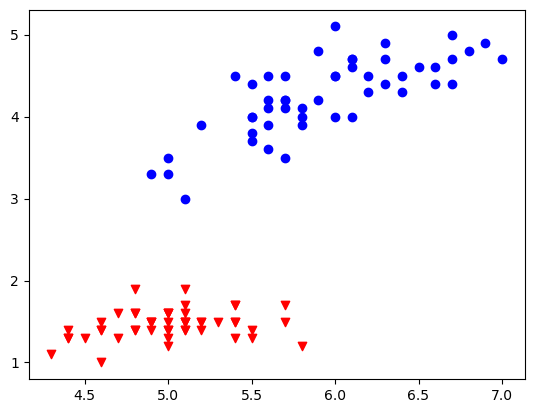

In [33]:
plt.scatter(X[:50,0],X[:50,1],color='red',marker='v',label='Setosa')
plt.scatter(X[50:,0],X[50:,1],color='blue',marker='o',label='Versicolor')

Text(0, 0.5, 'errors')

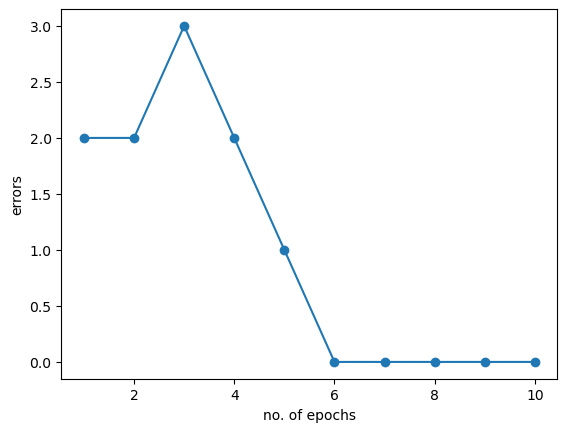

In [34]:
model=Perceptron(eta=0.1,n_iter=10)
model.fit(X,y)
plt.plot(range(1,len(model.errors_)+1),model.errors_,marker='o')
plt.xlabel('no. of epochs')
plt.ylabel('errors')

In [35]:
from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier, resolution=0.02):
    # setup marker generator and color map
    markers = ('o', 's', '^', 'v', '<')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
    np.arange(x2_min, x2_max, resolution))
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)
    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
        y=X[y == cl, 1],
        alpha=0.8,
        c=colors[idx],
        marker=markers[idx],
        label=f'Class {cl}',
        edgecolor='black')

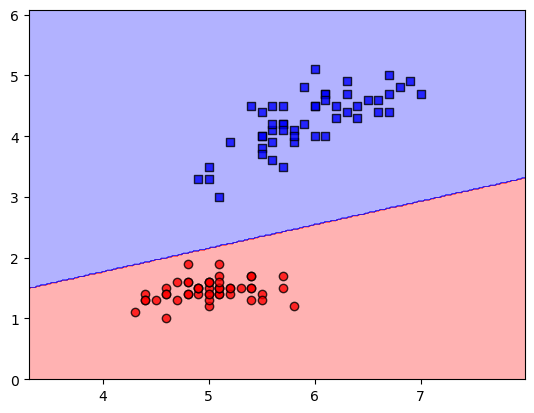

In [36]:
plot_decision_regions(X,y,model)

# Adaline

In [59]:
class AdalineGD:
    def __init__(self, eta=0.01, n_iter=50, seed=1):
        self.rgen=np.random.RandomState(seed)
        self.eta=eta
        self.n_iter=n_iter
    def fit(self,X,y):
        self.w_=self.rgen.normal(loc=0,scale=0.01,size=X.shape[1])
        self.b_=np.float_(0.)
        self.losses_=[]
        for _ in range(self.n_iter):
            net_input=self.net_input(X)
            output=self.activation(net_input)
            error=y-output
            self.w_+=( -self.eta*2.0*(np.dot(X.T,error)/X.shape[0]) )
            self.b_+=( -self.eta*2.0*error.mean() )
            loss=error**2
            self.losses_.append(loss.mean())
        return self
    def activation(self,X):
        return X
    def net_input(self,X):
        return np.dot(X,self.w_) + self.b_
    def predict(self,X):
        return np.where(self.net_input(X) >= 0.5, 1, 0)

/tmp/ipykernel_4064/1376230412.py:3: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


[0.43476858262289936,
 21.41139413904957,
 1751.8417442409589,
 145038.51381240776,
 12010561.784128536,
 994591928.2223139,
 82361940070.55476,
 6820374253823.094,
 564793701111972.6,
 4.6770442932376536e+16]

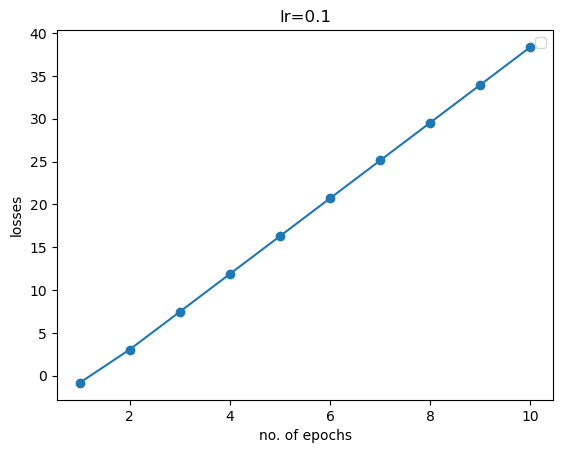

In [77]:
model=AdalineGD(eta=0.1,n_iter=10)
model.fit(X,y)
plt.legend()
plt.plot(range(1,len(model.losses_)+1),np.log(model.losses_),marker='o')
plt.title('lr=0.1')
plt.xlabel('no. of epochs')
plt.ylabel('losses')
model.losses_

/tmp/ipykernel_4064/830449613.py:3: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


[0.43476858262289936,
 0.43518986717764113,
 0.43561182289369943,
 0.4360344508582841,
 0.43645775216036564,
 0.43688172789068025,
 0.4373063791417317,
 0.4377317070077942,
 0.4381577125849152,
 0.4385843969709186]

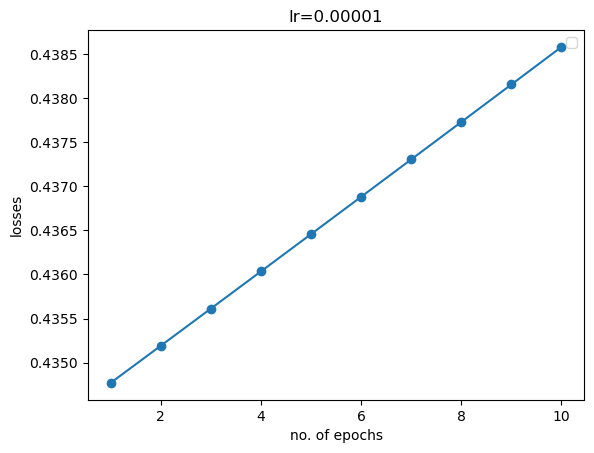

In [78]:
model=AdalineGD(eta=0.00001,n_iter=10)
model.fit(X,y)
plt.legend()
plt.plot(range(1,len(model.losses_)+1),model.losses_,marker='o')
plt.title('lr=0.00001')
plt.xlabel('no. of epochs')
plt.ylabel('losses')
model.losses_